In [2]:
import pandas as pd

In [61]:
rent = pd.read_csv('CleanedRent.csv')

In [46]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2986 entries, 0 to 2985
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Post_Date     2986 non-null   object 
 1   Neighborhood  2986 non-null   object 
 2   Price         2986 non-null   float64
 3   Title         2986 non-null   object 
 4   Url           2986 non-null   object 
 5   Bedroom       2336 non-null   float64
 6   sqft          2776 non-null   float64
dtypes: float64(3), object(4)
memory usage: 163.4+ KB


In [47]:
rent.head()

,Post_Date,Neighborhood,Price,Title,Url,Bedroom,sqft
0,2022-08-18 15:24:00,Seattle,1495.0,We are a new building located in Queen Anne! N...,https://seattle.craigslist.org/see/apa/d/seatt...,NaN,320.0
1,2022-08-18 15:23:00,Bellevue,2750.0,"2BR Town Home, Modern kitchen, Tons of storage...",https://seattle.craigslist.org/see/apa/d/belle...,2.0,1057.0
2,2022-08-18 15:23:00,Seattle,1499.0,"Walk-In Closets, Cable Ready, Old World Charm ...",https://seattle.craigslist.org/see/apa/d/seatt...,NaN,359.0
3,2022-08-18 15:23:00,Seattle,1848.0,"Heated Indoor Pool, Sauna, & Spa, Separate Din...",https://seattle.craigslist.org/see/apa/d/seatt...,1.0,700.0
4,2022-08-18 15:22:00,Seattle,2804.0,"Call for Details, Catering Kitchen, Ceramic Tile",https://seattle.craigslist.org/see/apa/d/call-...,1.0,701.0


In [19]:
rent.columns

Index(['Post_Date', 'Neighborhood', 'Price', 'Title', 'Url', 'Bedroom',
       'sqft'],
      dtype='object')

In [20]:
rent.index

RangeIndex(start=0, stop=2986, step=1)

In [62]:
rent.describe()

,Price,Bedroom,sqft
count,2986.000000,2336.000000,2776.000000
mean,2338.233088,1.519692,826.725504
std,1017.819440,0.737231,2644.569075
min,0.000000,1.000000,110.000000
25%,1700.750000,1.000000,527.750000
50%,2175.000000,1.000000,680.000000
75%,2715.750000,2.000000,912.000000
max,15000.000000,8.000000,98116.000000


In [63]:
rent[rent['sqft']>10000]

,Post_Date,Neighborhood,Price,Title,Url,Bedroom,sqft
1641,2022-08-17 10:48:00,Seattle,3245.0,🧡Amazing Remodeled 3br/1ba in Ballard! 59-3,https://seattle.craigslist.org/see/apa/d/seatt...,3.0,98107.0
1684,2022-08-17 10:21:00,Seattle,4295.0,🏖️LUXURY Top Floor 2 br/2ba right on Alki Beac...,https://seattle.craigslist.org/see/apa/d/seatt...,2.0,98116.0


In [65]:
rent.drop(labels=[1641,1684],axis=0, inplace=True)

In [66]:
rent.describe()

,Price,Bedroom,sqft
count,2984.000000,2334.000000,2774.000000
mean,2337.273458,1.518852,756.585076
std,1017.394142,0.736842,409.648373
min,0.000000,1.000000,110.000000
25%,1700.000000,1.000000,527.250000
50%,2174.000000,1.000000,680.000000
75%,2715.000000,2.000000,912.000000
max,15000.000000,8.000000,6830.000000


In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

Rent price distribution:

From the histogram below we can see that the rental price per month falls between 1500 and 2500.
Mean price is $2337.

(array([1.500e+01, 4.370e+02, 1.232e+03, 7.790e+02, 3.130e+02, 1.320e+02,
        3.400e+01, 1.400e+01, 1.000e+01, 6.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([    0.,   750.,  1500.,  2250.,  3000.,  3750.,  4500.,  5250.,
         6000.,  6750.,  7500.,  8250.,  9000.,  9750., 10500., 11250.,
        12000., 12750., 13500., 14250., 15000.]),
 <BarContainer object of 20 artists>)

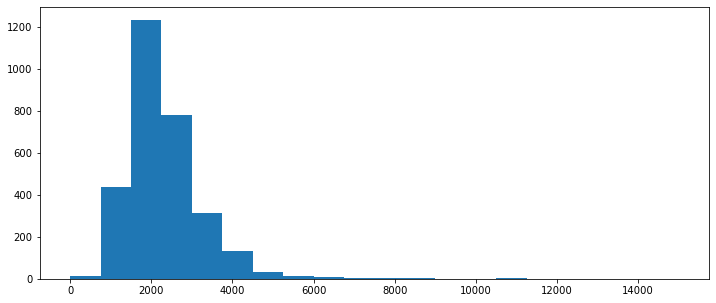

In [52]:
plt.figure(figsize=(12,5))
plt.hist(rent['Price'], bins=20)

Now I want to create a scatter plot to see how price and sqft are related

Text(0, 0.5, 'Sqft')

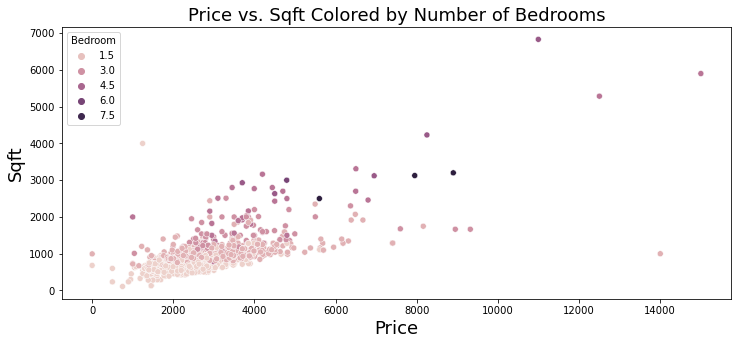

In [53]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.scatterplot(x=rent['Price'], y=rent['sqft'],hue=rent['Bedroom'])

plt.title('Price vs. Sqft Colored by Number of Bedrooms', fontsize = 18)
plt.xlabel('Price', fontsize=18)
plt.ylabel('Sqft', fontsize=18)

Let's find out the correlation between Price, Bedroom, and Sqft

Price has high correlation with sqft\
Bedroom also has high correlation with sqft\
However, number of bedroom is not strongly related to price

In [54]:
rent.corr()

,Price,Bedroom,sqft
Price,1.000000,0.490424,0.732170
Bedroom,0.490424,1.000000,0.762674
sqft,0.732170,0.762674,1.000000


<AxesSubplot:xlabel='Price', ylabel='sqft'>

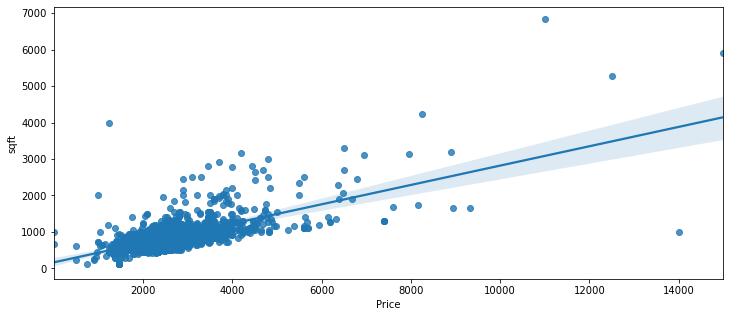

In [57]:
plt.figure(figsize=(12,5))
sns.regplot(x='Price', y='sqft', data = rent.dropna())

#Looks like it's plotting correctly

In [67]:
rent['Neighborhood'].nunique()

89

In [80]:
rent.groupby('Neighborhood').mean()['Price'].sort_values()

Neighborhood
Lake Forest Park      750.0
Chehalis             1024.5
Snohomish            1245.0
Snoqualmie           1364.0
Lfp North Sea        1400.0
                     ...   
West Woodland        3500.0
Woodinville          3661.0
Volunteer Park       4495.0
Westlake             5495.0
Clyde Hill          10995.0
Name: Price, Length: 89, dtype: float64

<AxesSubplot:xlabel='Neighborhood', ylabel='Price'>

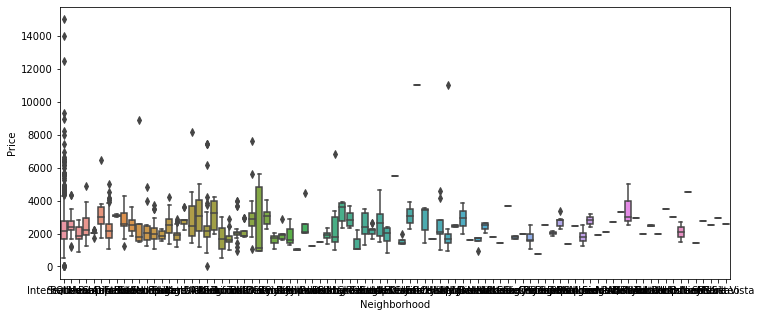

In [130]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Neighborhood',y='Price',data=rent)

In [183]:
count = rent.groupby('Neighborhood').count()
count

,Post_Date,Price,Title,Url,Bedroom,sqft,Count_hood
Neighborhood,,,,,,,
Alki,2,2,2,2,2,1,2
Auburn,3,3,3,3,3,3,3
Bainbridge,4,4,4,4,4,0,4
Ballard,50,50,50,50,46,47,50
Beacon Hill,20,20,20,20,19,17,20
...,...,...,...,...,...,...,...
Wallingford,11,11,11,11,8,11,11
Wedgewood/Bryant,1,1,1,1,1,1,1
West Woodland,1,1,1,1,1,1,1


In [184]:
rent['Count_hood'] = rent.groupby('Neighborhood')['Neighborhood'].transform('count')

<AxesSubplot:xlabel='Neighborhood', ylabel='Price'>

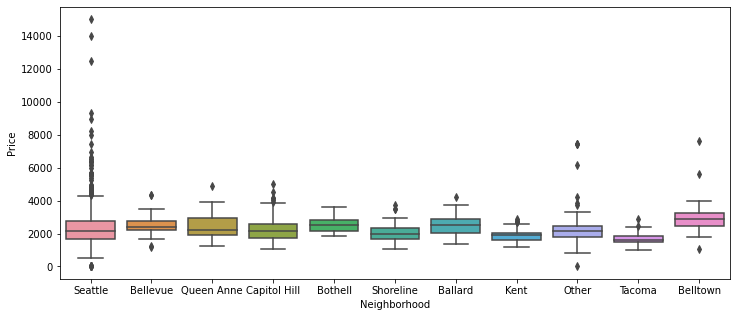

In [185]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Neighborhood', y='Price', data = rent[rent['Count_hood'] > 30])